In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [4]:
df_price = pd.read_csv("data/ch04_stock_price.csv", index_col="Date")
df_interest_rate = pd.read_csv("data/ch04_interest_rate.csv", index_col="Date")

In [5]:
df_rate = df_price.pct_change()
df_rate

,SP500,MCD
Date,,
2016-06-06,NaN,NaN
2016-06-07,0.001289,-0.000820
2016-06-08,0.003310,0.001723
2016-06-09,-0.001718,0.005569
2016-06-10,-0.009175,-0.003502
...,...,...
2021-05-27,0.001165,0.010803
2021-05-28,0.000769,0.001370
2021-06-01,-0.000492,-0.002779


In [6]:
# MCD: マクドナルド米国本社の株価
# ^TNX: 米国１０年債の利回り
df_rate = pd.concat([df_rate, df_interest_rate["Adj Close"]], axis=1, join="inner")
df_rate.columns = ["SP500", "MCD", "^TNX"]
df_rate

,SP500,MCD,^TNX
Date,,,
2016-06-06,NaN,NaN,1.723
2016-06-07,0.001289,-0.000820,1.713
2016-06-08,0.003310,0.001723,1.706
2016-06-09,-0.001718,0.005569,1.680
2016-06-10,-0.009175,-0.003502,1.639
...,...,...,...
2021-05-27,0.001165,0.010803,1.610
2021-05-28,0.000769,0.001370,1.581
2021-06-01,-0.000492,-0.002779,1.615


In [7]:
# リスク・プレミアム算出
df_rp = pd.DataFrame()
df_rp["SP500"] = df_rate["SP500"] - df_rate["^TNX"] * 0.01 / 255
df_rp["MCD"] = df_rate["MCD"] - df_rate["^TNX"] * 0.01 / 255
df_rp

,SP500,MCD
Date,,
2016-06-06,NaN,NaN
2016-06-07,0.001222,-0.000887
2016-06-08,0.003243,0.001656
2016-06-09,-0.001784,0.005503
2016-06-10,-0.009239,-0.003566
...,...,...
2021-05-27,0.001102,0.010740
2021-05-28,0.000707,0.001308
2021-06-01,-0.000556,-0.002842


In [8]:
df_rp = df_rp.dropna()
df_rp

,SP500,MCD
Date,,
2016-06-07,0.001222,-0.000887
2016-06-08,0.003243,0.001656
2016-06-09,-0.001784,0.005503
2016-06-10,-0.009239,-0.003566
2016-06-13,-0.008179,0.005085
...,...,...
2021-05-27,0.001102,0.010740
2021-05-28,0.000707,0.001308
2021-06-01,-0.000556,-0.002842


Text(0, 0.5, 'MCD')

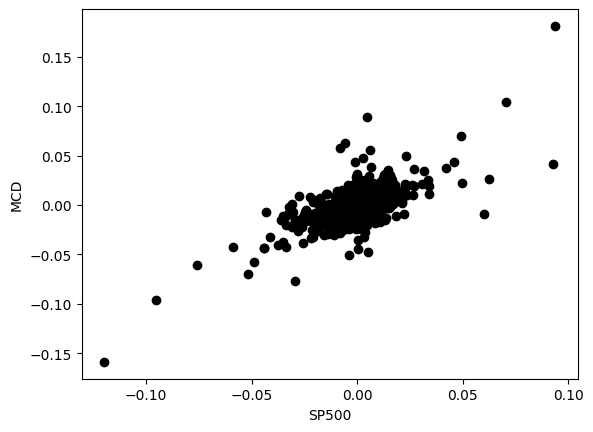

In [15]:
plt.scatter(df_rp["SP500"], df_rp["MCD"], color="black")

plt.xlabel("SP500")
plt.ylabel("MCD")

In [19]:
val_size = 0.2
df_train, df_val = train_test_split(df_rp, test_size=val_size, shuffle=False)

In [22]:
X_train = df_train.sort_values("SP500")["SP500"]
X_val = df_val.sort_values("SP500")["SP500"]

y_train = df_train.sort_values("SP500")["MCD"]
y_val = df_val.sort_values("SP500")["MCD"]

In [31]:
reg = linear_model.LinearRegression()
reg.fit(X_train.values.reshape(-1, 1), y_train.values)
pred_train_1 = reg.predict(X_train.values.reshape(-1, 1))

print(reg.intercept_)
print(reg.coef_)

0.00026777831694420584
[0.82544637]


In [32]:
# CAPMの理論通り、切片がないとき
reg_0 = linear_model.LinearRegression(fit_intercept=False)
reg_0.fit(X_train.values.reshape(-1, 1), y_train.values)
pred_train_0 = reg_0.predict(X_train.values.reshape(-1, 1))

print(reg_0.intercept_)
print(reg_0.coef_)

0.0
[0.8261595]


In [34]:
MSE0 = mean_squared_error(pred_train_0, y_train)
MSE1 = mean_squared_error(pred_train_1, y_train)

print(MSE0)
print(MSE1)

0.00013072623392365067
0.00013065460681415818


In [39]:
poly = PolynomialFeatures(degree = 5)

X_train_poly = poly.fit_transform(X_train.values.reshape(-1, 1))
poly_reg = linear_model.LinearRegression().fit(X_train_poly, y_train.values)

print(poly_reg.intercept_)
print(poly_reg.coef_)

0.0005591747261244887
[ 0.00000000e+00  5.96703298e-01 -2.09378185e+00  4.80747082e+01
  3.39018082e+02  1.71746614e+03]


Text(0, 0.5, 'MCD')

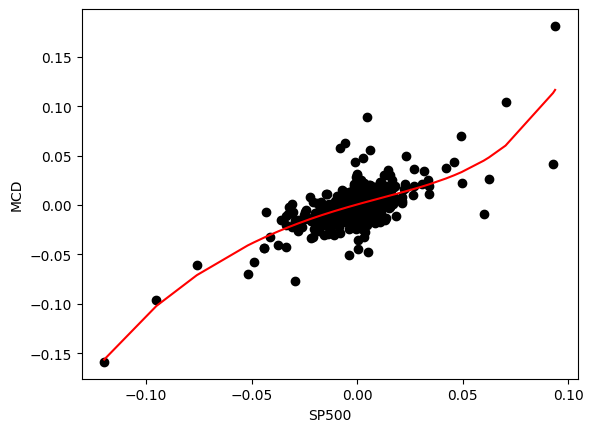

In [42]:
pred_train_5 = poly_reg.predict(X_train_poly)
plt.scatter(X_train.values, y_train.values, color="black")
plt.plot(X_train.values, pred_train_5, color="red")
plt.xlabel("SP500")
plt.ylabel("MCD")

In [43]:
MSE5 = mean_squared_error(pred_train_5, y_train)
print(MSE5)

0.00012051143117314137
